In [16]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
# # Hide warning messages in notebook
# import warnings
# warnings.filterwarnings('ignore')

In [18]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse = pd.read_csv(mouse_drug_data_to_load)
df_clinical = pd.read_csv(clinical_trial_data_to_load)

In [20]:
# Combine the data into a single dataset
df = pd.merge(df_clinical,df_mouse,on="Mouse ID", how="outer")
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [78]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint and convert to dataframe (reset_index)
avgVol = df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()

# Preview DataFrame
avgVol.head(16)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [81]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
semVol = df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()

# Preview DataFrame
semVol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [82]:
# Minor Data Munging to Re-Format the Data Frames
pv_semVol = semVol.pivot(index="Timepoint", columns="Drug")
pv_avgVol = avgVol.pivot(index="Timepoint", columns="Drug")


# Preview that Reformatting worked
pv_avgVol_by_DrugTime.head()
# list(semVol_by_DrugTime['Drug'].unique())

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

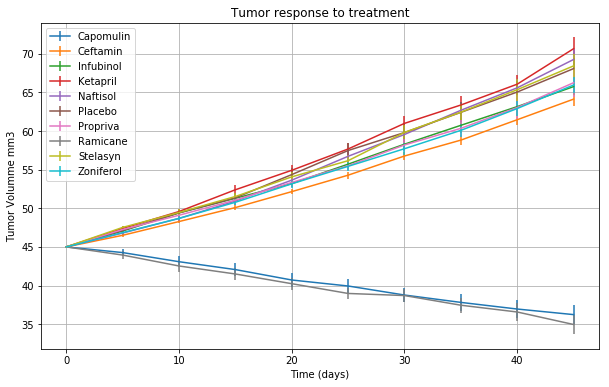

In [83]:
# Generate the Plot (with Error Bars)
#------------------------------------
# Create figure
fig, ax = plt.subplots()
# Plot evolution of tumor size with time (adding error bars)
pv_avgVol.plot(yerr=pv_semVol,ax=ax)
# Settings of the plot
fig.set_size_inches(10,6) # size of the figure
ax.legend(list(semVol['Drug'].unique())) # Changing the legend to be more readable
ax.set_xlabel('Time (days)') # Xlabel
ax.set_ylabel("Tumor Volumme mm3") # Ylable
ax.set_title("Tumor response to treatment")
plt.grid() # adding the grid

# Save the Figure
plt.savefig("TumorVolume_with_Time.png")
 
# Show the figure
plt.show()

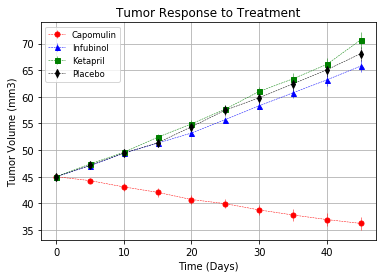

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [84]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint # Convert to DataFrame
avgMS = df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean().reset_index()

# Preview DataFrame
avgMS.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [85]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint # Convert to DataFrame
semMS = df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem().reset_index()

# Preview DataFrame
semMS.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [89]:
# Minor Data Munging to Re-Format the Data Frames
pv_semMS = semMS.pivot(index="Timepoint", columns="Drug")
pv_avgMS = avgMS.pivot(index="Timepoint", columns="Drug")
# Preview that Reformatting worked
pv_avgMS.head()

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

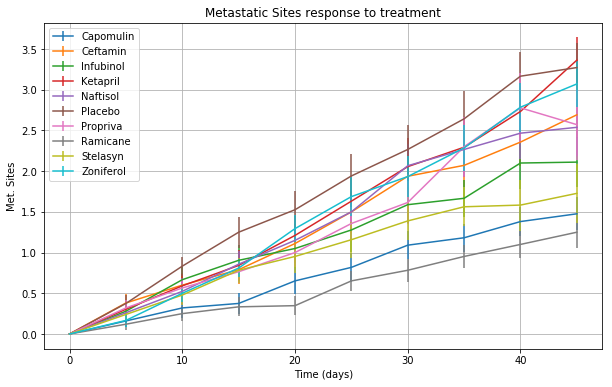

In [91]:
# Generate the Plot (with Error Bars)
#------------------------------------
# Create figure
fig, ax = plt.subplots()
# Plot evolution of tumor size with time (adding error bars)
pv_avgMS.plot(yerr=pv_semMS,ax=ax)
# Settings of the plot
fig.set_size_inches(10,6) # size of the figure
ax.legend(list(semVol['Drug'].unique())) # Changing the legend to be more readable
ax.set_xlabel('Time (days)') # Xlabel
ax.set_ylabel("Met. Sites") # Ylable
ax.set_title("Metastatic Sites response to treatment")
plt.grid() # adding the grid

# Save the Figure
plt.savefig("MS_with_Time.png")
 
# Show the figure
plt.show()

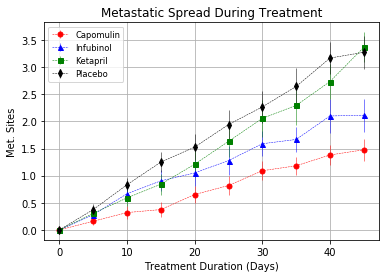

## Survival Rates

In [93]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = df.groupby(['Drug','Timepoint'])['Mouse ID'].nunique().reset_index()

# Convert to DataFrame

# Preview DataFrame
survival.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [94]:
# Minor Data Munging to Re-Format the Data Frames
pv_survival = survival.pivot(index="Timepoint", columns="Drug")
# Preview the Data Frame
pv_survival.head()

Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       25   
5                25       21        25       23       23      24       24   
10               25       20        21       22       21      24       22   
15               24       19        21       19       21      20       16   
20               23       18        20       19       20      19       16   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       25        25  
5               25       24        24  
10              24       22        22  
15              24       22        21  
20              23       20        17

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

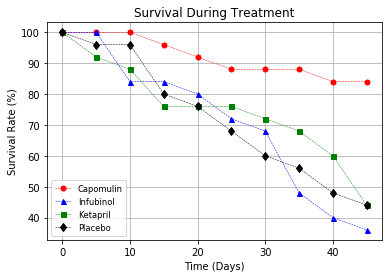

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

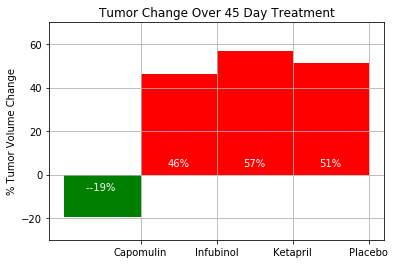